In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Зчитування нащого датасету

In [3]:
data = pd.read_csv('../research_model/data/cardio_train.csv',sep=";")
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["age"] = data["age"] / 365
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
data['age'] = data["age"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68983 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68983 non-null  int32  
 1   gender       68983 non-null  int64  
 2   height       68983 non-null  int64  
 3   weight       68983 non-null  float64
 4   ap_hi        68983 non-null  int64  
 5   ap_lo        68983 non-null  int64  
 6   cholesterol  68983 non-null  int64  
 7   gluc         68983 non-null  int64  
 8   smoke        68983 non-null  int64  
 9   alco         68983 non-null  int64  
 10  active       68983 non-null  int64  
 11  cardio       68983 non-null  int64  
 12  bmi          68983 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 7.1 MB


In [6]:
df = pd.read_csv('../research_model/data/cardio_train.csv',sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df_sex = df.copy()
df_sex['gender'] = df['gender'].replace({1: 'Female', 2: 'Male'})
grouped = df_sex.groupby('gender')[['active', 'alco', 'smoke', 'cholesterol']].sum()
grouped

,active,alco,smoke,cholesterol
gender,,,,
Female,36516,1161,813,63047
Male,19745,2603,5356,32634


In [8]:
df.drop("id",axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df["age"] = df["age"] / 365
df["bmi"] = df["weight"] / (df["height"]/100)**2
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))
df = df[~out_filter]
df['age'] = df["age"].astype(int)

df.drop("height",axis=1,inplace=True)
df.drop("weight",axis=1,inplace=True)
out_filter2 = ((df["ap_hi"] < 0) | (df["ap_lo"] < 0))
df = df[~out_filter2]

In [9]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [9]:
 
df['smoke'].replace([0,1] , ['Ні' , 'Так'] , inplace=True)
df['gluc'].replace([1,2,3], ['нормальний', 'вище норми', 'значно вище норми'], inplace=True)
df['alco'].replace({0: 'Не п.є', 1: 'Пє'} , inplace=True )
df['active'].replace({0: 'Неактивний', 1: 'Активний'} , inplace=True )
df['cardio'].replace({0: 'Немає захворювань', 1: 'Має захворювання'} , inplace=True )
df['cholesterol'].replace([1,2,3] ,['в нормі', 'вище норми', 'значно вище норми'],inplace=True)


C:\Users\dimap\AppData\Local\Temp\ipykernel_8512\158593064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoke'].replace([0,1] , ['Ні' , 'Так'] , inplace=True)
C:\Users\dimap\AppData\Local\Temp\ipykernel_8512\158593064.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

C:\Users\dimap\AppData\Local\Temp\ipykernel_8512\2401133626.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby(['age_group', 'gluc']).size().reset_index(name='count')


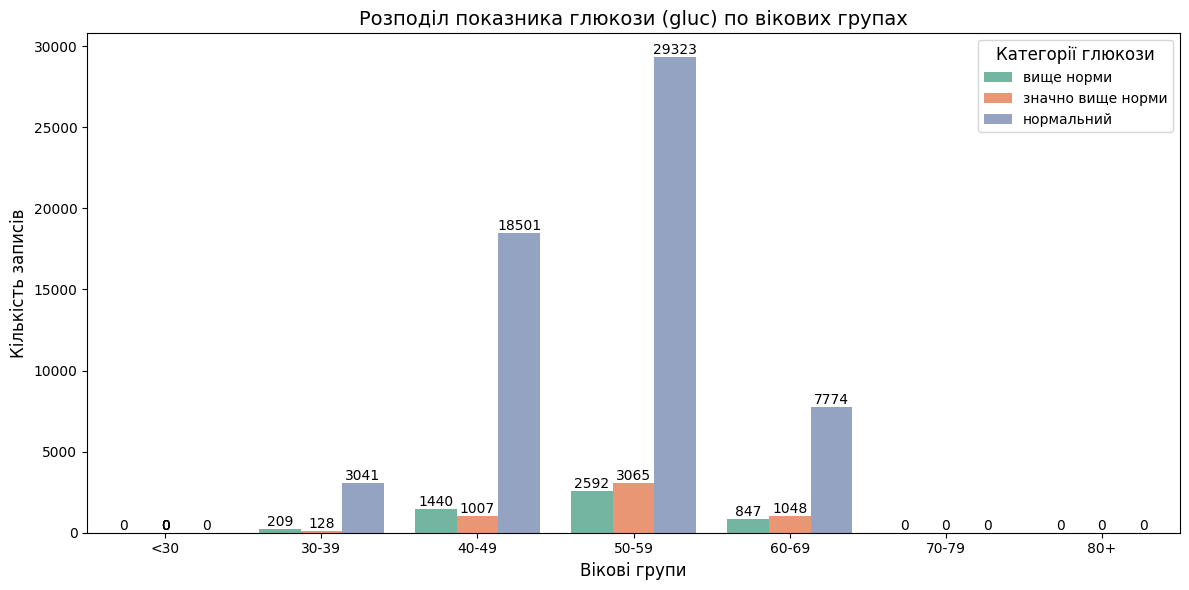

In [17]:
bins = [0, 20, 40, 50,60,70,80,100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Побудова стовпчастого графіка з розподілом кольорів за категоріями gluc
count_data = df.groupby(['age_group', 'gluc']).size().reset_index(name='count')

# Побудова стовпчастого графіка
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=count_data,
    x='age_group',
    y='count',
    hue='gluc',  # Різні категорії gluc
    palette='Set2'
)

# Додавання чисел на стовпчики
for p in bar_plot.patches:
    bar_plot.annotate(
        format(int(p.get_height()), 'd'),  # Форматування числа
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Позиція тексту
        ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10
    )

# Додавання заголовків
plt.title("Розподіл показника глюкози (gluc) по вікових групах", fontsize=14)
plt.xlabel("Вікові групи", fontsize=12)
plt.ylabel("Кількість записів", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Налаштування легенди
plt.legend(title="Категорії глюкози", fontsize=10, title_fontsize=12, loc='upper right')

# Показ графіка
plt.tight_layout()
plt.show()

In [13]:
def categorize_blood_pressure(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Нормальний'
    elif 120 <= ap_hi < 140 or 80 <= ap_lo < 90:
        return 'Передгіпертензія'
    elif 140 <= ap_hi < 160 or 90 <= ap_lo < 100:
        return 'Гіпертонія 1 стадії'
    elif 160 <= ap_hi or ap_lo >= 100:
        return 'Гіпертонія 2 стадії'
    elif ap_hi >= 180 or ap_lo >= 120:
        return 'Гіпертонічний криз'
        
df['blood_pressure_category'] = df.apply(lambda row: categorize_blood_pressure(row['ap_hi'], row['ap_lo']), axis=1)
df[['ap_hi', 'ap_lo', 'blood_pressure_category']].head(10)

,ap_hi,ap_lo,blood_pressure_category
0,110,80,Передгіпертензія
1,140,90,Гіпертонія 1 стадії
2,130,70,Передгіпертензія
3,150,100,Гіпертонія 1 стадії
4,100,60,Нормальний
5,120,80,Передгіпертензія
6,130,80,Передгіпертензія
7,130,90,Передгіпертензія
8,110,70,Нормальний
9,110,60,Нормальний


In [32]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Втрата ваги'
    elif 18.5 <= bmi < 25:
        return 'Нормальний'
    elif 25 <= bmi < 30:
        return 'Перевага'
    elif 30 <= bmi < 35:
        return 'Ожиріння 1 класу'
    elif 35 <= bmi < 40:
        return 'Ожиріння 2 класу'
    else: 
        return 'Екстремальне ожиріння'


df['bmi'] = df['bmi'].apply(categorize_bmi)

In [33]:
df_grouped = df.groupby("cholesterol")["bmi"].value_counts()
d = {1: 'жінка', 2:'чоловік'}
df['gender'] = df['gender'].replace(d)

In [34]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,blood_pressure_category
0,50,чоловік,110,80,в нормі,нормальний,Ні,Не п.є,Активний,Немає захворювань,Нормальний,Передгіпертензія
1,55,жінка,140,90,значно вище норми,нормальний,Ні,Не п.є,Активний,Має захворювання,Ожиріння 1 класу,Гіпертонія 1 стадії
2,51,жінка,130,70,значно вище норми,нормальний,Ні,Не п.є,Неактивний,Має захворювання,Нормальний,Передгіпертензія
3,48,чоловік,150,100,в нормі,нормальний,Ні,Не п.є,Активний,Має захворювання,Перевага,Гіпертонія 1 стадії
4,47,жінка,100,60,в нормі,нормальний,Ні,Не п.є,Неактивний,Немає захворювань,Нормальний,Нормальний
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,чоловік,120,80,в нормі,нормальний,Так,Не п.є,Активний,Немає захворювань,Перевага,Передгіпертензія
69996,61,жінка,140,90,вище норми,вище норми,Ні,Не п.є,Активний,Має захворювання,Екстремальне ожиріння,Гіпертонія 1 стадії
69997,52,чоловік,180,90,значно вище норми,нормальний,Ні,Пє,Неактивний,Має захворювання,Ожиріння 1 класу,Гіпертонія 1 стадії
69998,61,жінка,135,80,в нормі,вище норми,Ні,Не п.є,Неактивний,Має захворювання,Перевага,Передгіпертензія


In [35]:
df.to_csv('../data/update_and_changed_signs_heart_cardio_train.csv',index=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int32  
 1   gender       68975 non-null  int64  
 2   ap_hi        68975 non-null  int64  
 3   ap_lo        68975 non-null  int64  
 4   cholesterol  68975 non-null  int64  
 5   gluc         68975 non-null  int64  
 6   smoke        68975 non-null  int64  
 7   alco         68975 non-null  int64  
 8   active       68975 non-null  int64  
 9   cardio       68975 non-null  int64  
 10  bmi          68975 non-null  float64
dtypes: float64(1), int32(1), int64(9)
memory usage: 6.1 MB


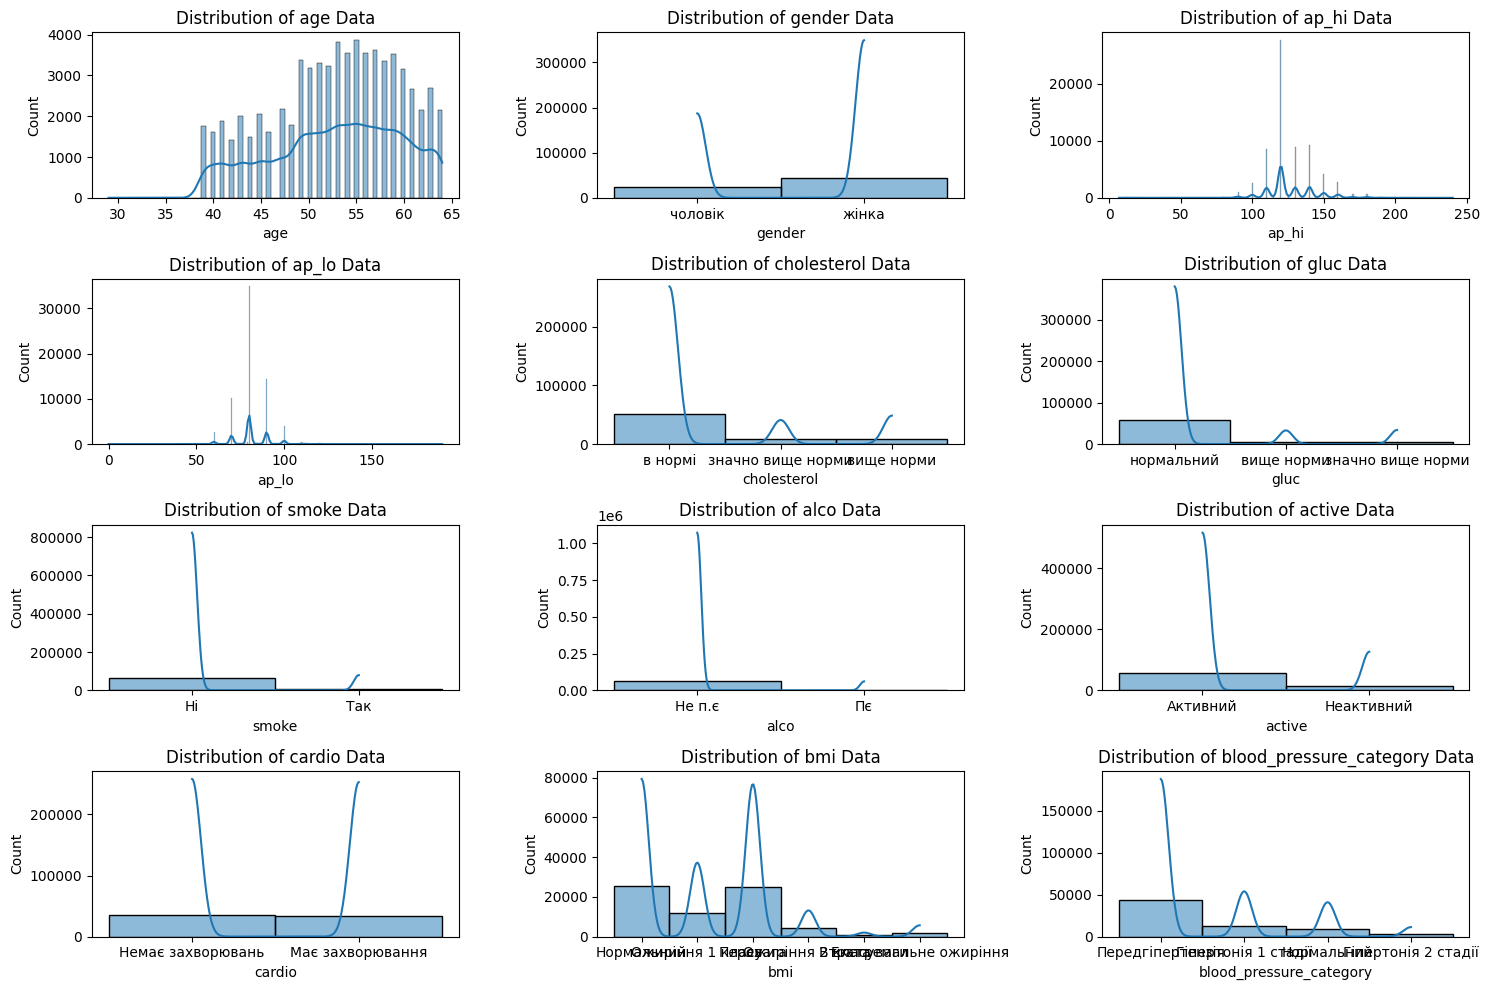

In [36]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

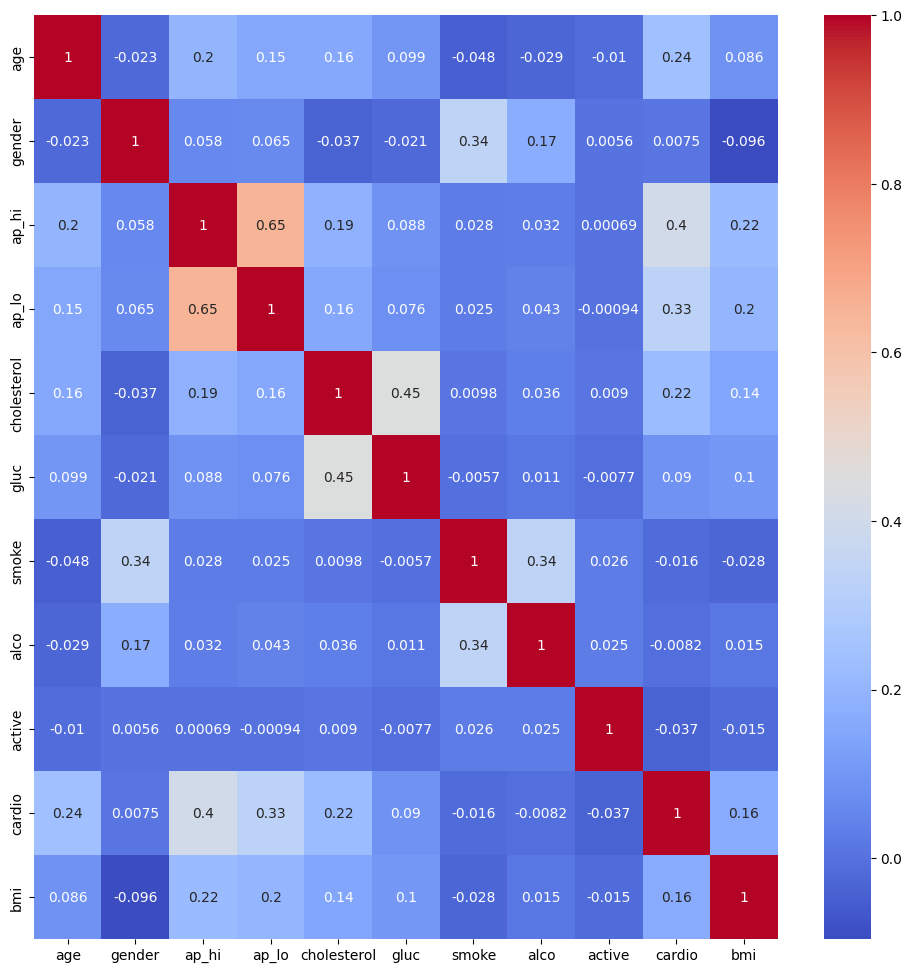

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show

Text(0, 0.5, 'Діастолічний артеріальний тиск (ap_lo)')

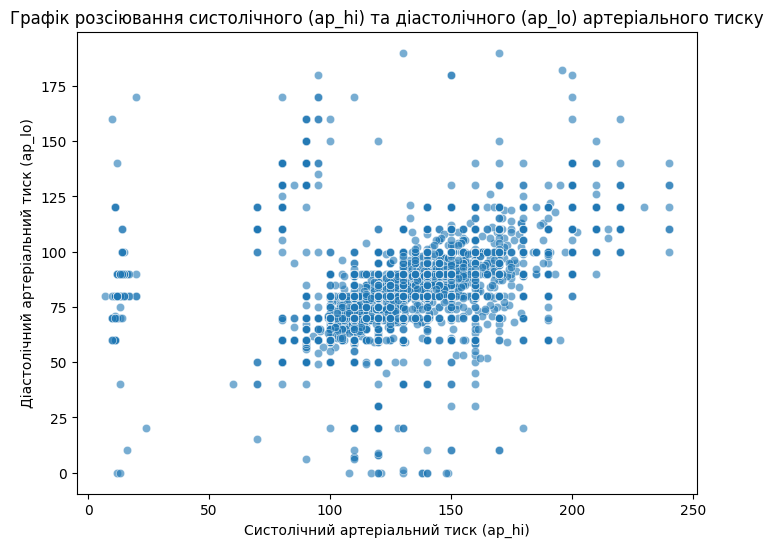

In [13]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(x="ap_hi", y="ap_lo", data=df,  alpha=0.6)

plt.title("Графік розсіювання систолічного (ap_hi) та діастолічного (ap_lo) артеріального тиску")
plt.xlabel("Систолічний артеріальний тиск (ap_hi)")
plt.ylabel("Діастолічний артеріальний тиск (ap_lo)")


Text(0, 0.5, 'Count')

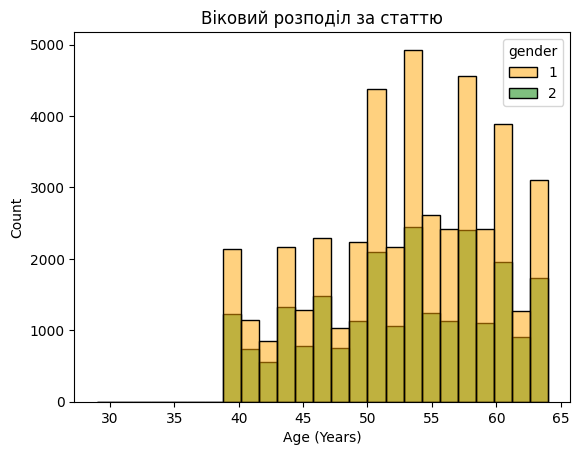

In [14]:
sns.histplot(data=df, x='age', hue='gender', kde=False, bins=25, palette=["orange" ,"green"])

plt.title('Віковий розподіл за статтю')
plt.xlabel('Age (Years)')
plt.ylabel('Count')

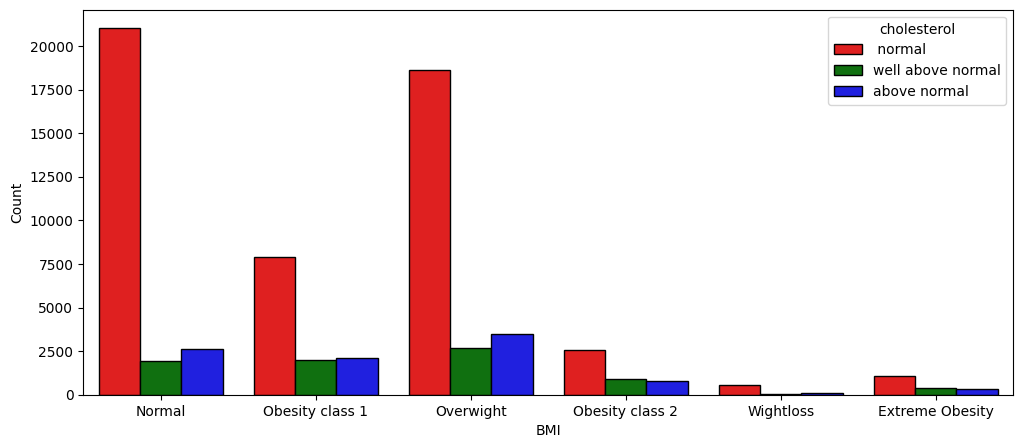

In [28]:
plt.figure(figsize=(12,5))  
sns.countplot(x="bmi", hue="cholesterol", data=df, palette=["red" , "green","blue"],edgecolor="black"
)

plt.xlabel("BMI")
plt.ylabel("Count")


plt.show()

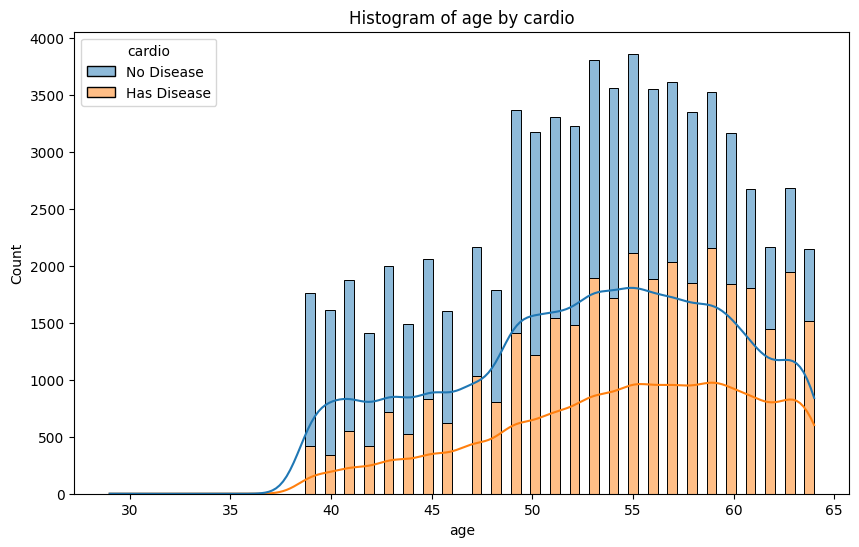

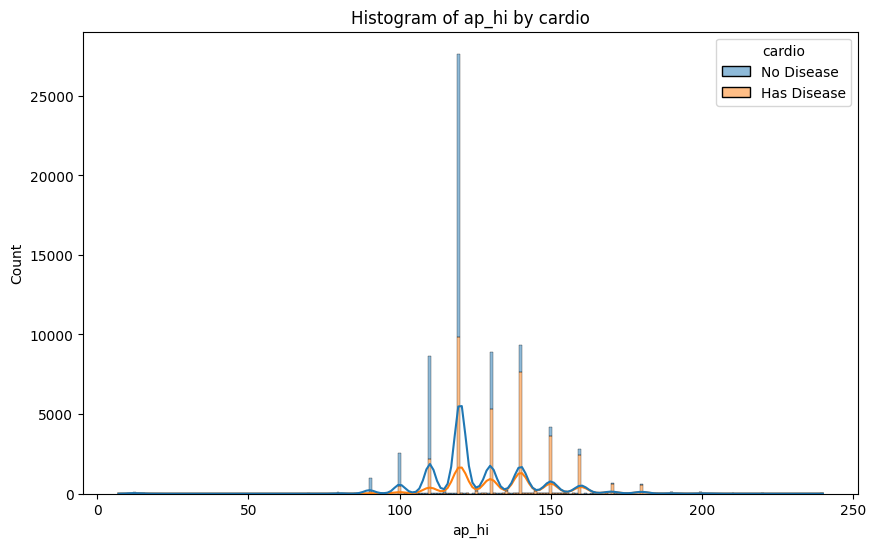

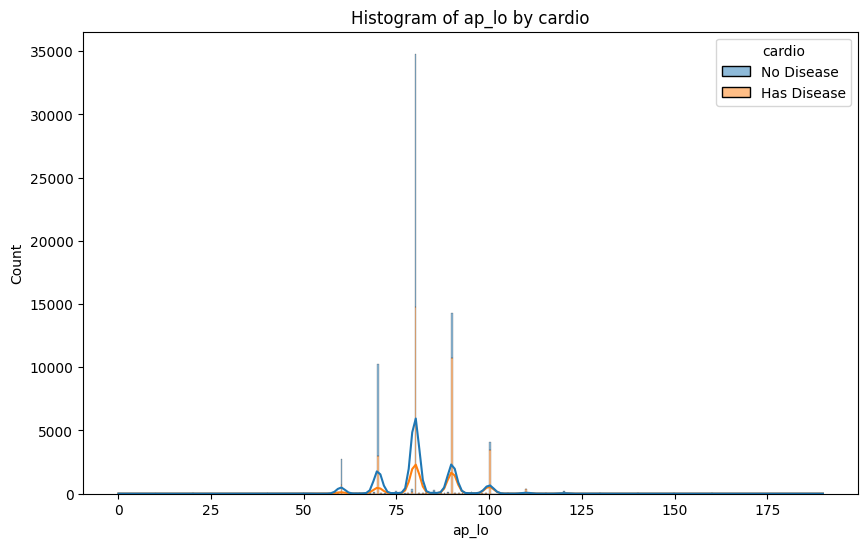

In [30]:
numerical_columns = ['age', 'ap_hi', 'ap_lo']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='cardio', multiple='stack', kde=True)
    plt.title(f'Histogram of {col} by cardio')
    plt.show()

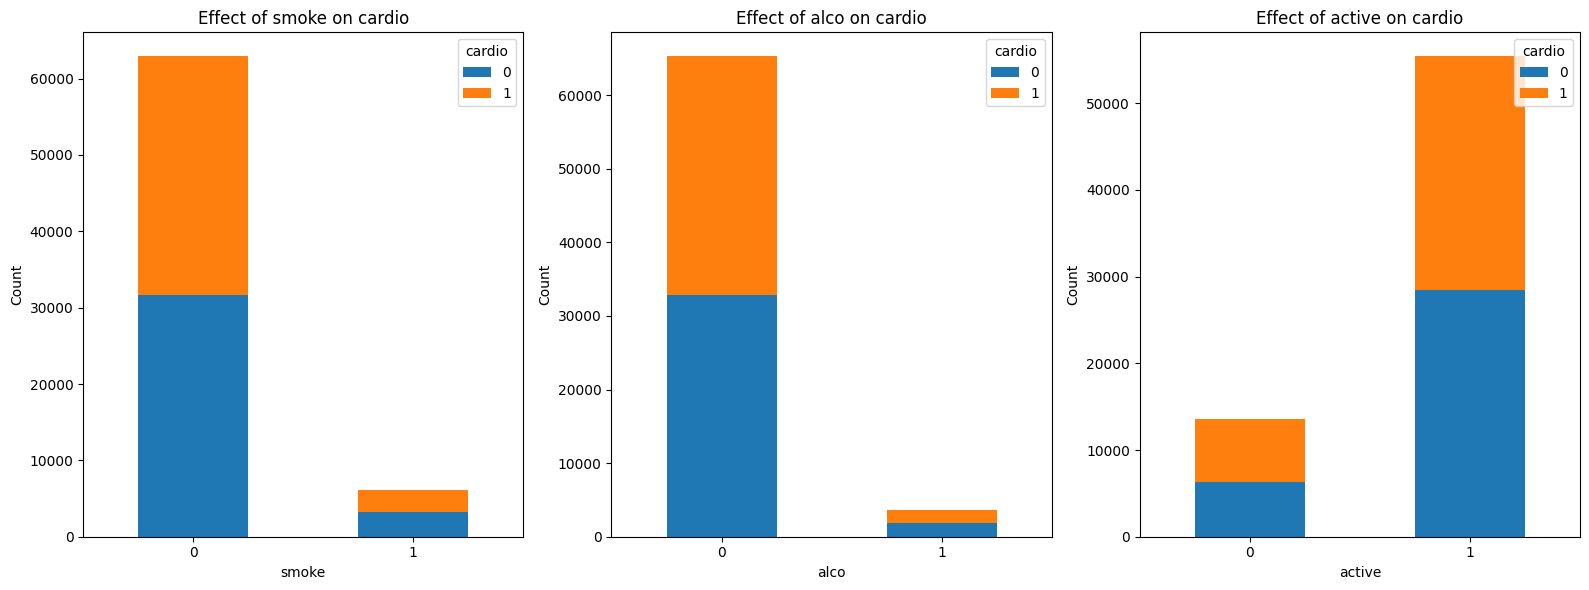

In [38]:
col = ['smoke', 'alco', 'active']

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for i, feature in enumerate(col):
    grouped = df.groupby([feature, 'cardio']).size().unstack()

    ax = axes[i]
    grouped.plot(ax=ax, kind='bar', stacked=True)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.set_title(f'Effect of {feature} on cardio')
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title='cardio', loc='upper right')
    
    ax.set_xticklabels(grouped.index, rotation=0)
    ax.set_xticks(range(len(grouped.index)))

plt.tight_layout()
plt.show()

In [39]:
df_sex = df.copy()
df_sex['gender'] = df['gender'].replace({1: 'Female', 2: 'Male'})
grouped = df_sex.groupby('gender')[['active', 'alco', 'smoke', 'cholesterol']].sum()

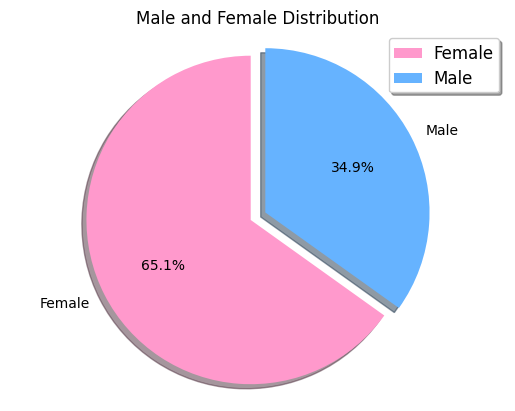

In [40]:
gender_counts = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#ff99cc', '#66b3ff']
explode = [0.1, 0]

fig, ax = plt.subplots()
ax.pie(gender_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)

ax.axis('equal')  
ax.set_title('Male and Female Distribution')

legend = ax.legend(loc='upper right', shadow=True)
for text in legend.get_texts():
    text.set_fontsize(12)

plt.show()

In [47]:
data['age_years'] = data['age'] // 365
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0,NaN
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,0,NaN
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0,NaN
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,0,NaN
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,0,NaN
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,0,NaN
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,0,NaN
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,0,NaN


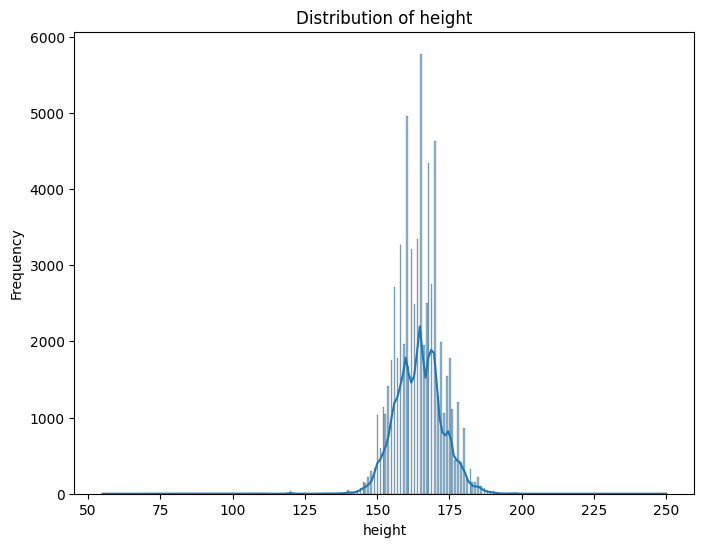

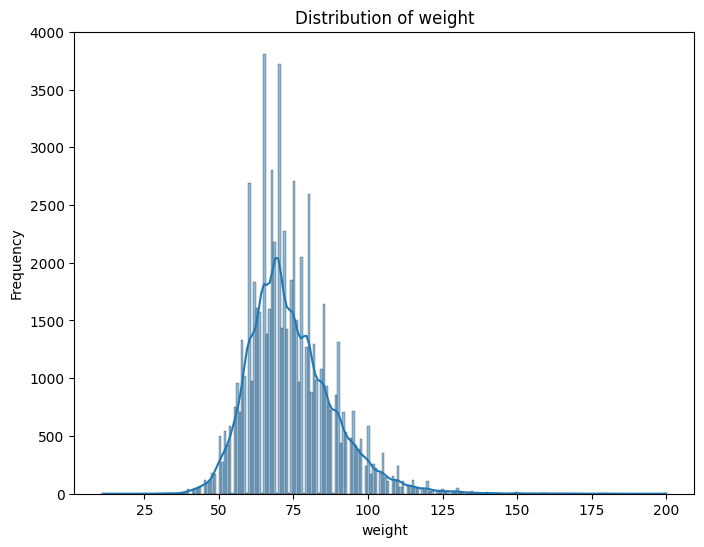

In [49]:
data['age_years'] = data['age'] // 365
numerical_features = ['height', 'weight']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

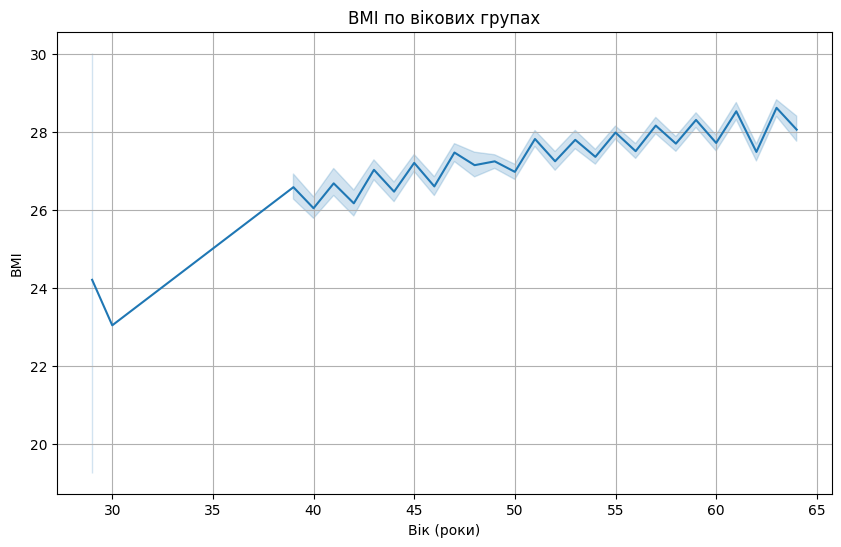

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='bmi', data=data)
plt.title('BMI по вікових групах')
plt.xlabel('Вік (роки)')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

<Axes: xlabel='cardio', ylabel='bmi'>

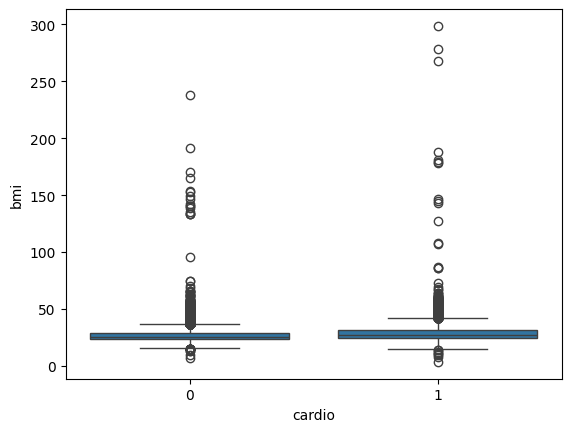

In [54]:
sns.boxplot(x='cardio', y='bmi', data=data)

Text(0.5, 1.0, 'Violinplot of Ca vs Max Heart Rate')

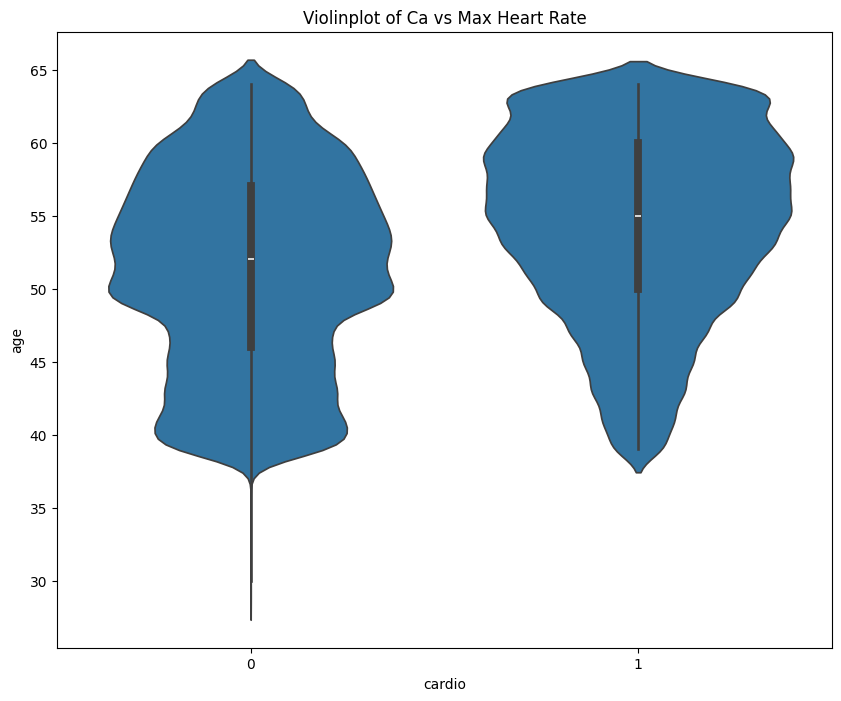

In [56]:
plt.figure(figsize=(10,8))
sns.violinplot(x='cardio',y='age',data=data)

plt.title('Violinplot of Cardio vs Age')

In [17]:
# data.drop("age_years",axis=1,inplace=True)
# Пульсовий тиск
data['pulse_pressure'] = data['ap_hi'] - data['ap_lo']
# Індекс пульсового тиску
data['pulse_pressure_index'] = data['pulse_pressure'] / data['ap_hi']
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,pulse_pressure,pulse_pressure_index
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,30,0.272727
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,50,0.357143
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,60,0.461538
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,50,0.333333
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,40,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,40,0.333333
69996,61,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,50,0.357143
69997,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,90,0.500000
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,55,0.407407


In [18]:
df_grouped = data.groupby('age')['pulse_pressure'].mean().reset_index()

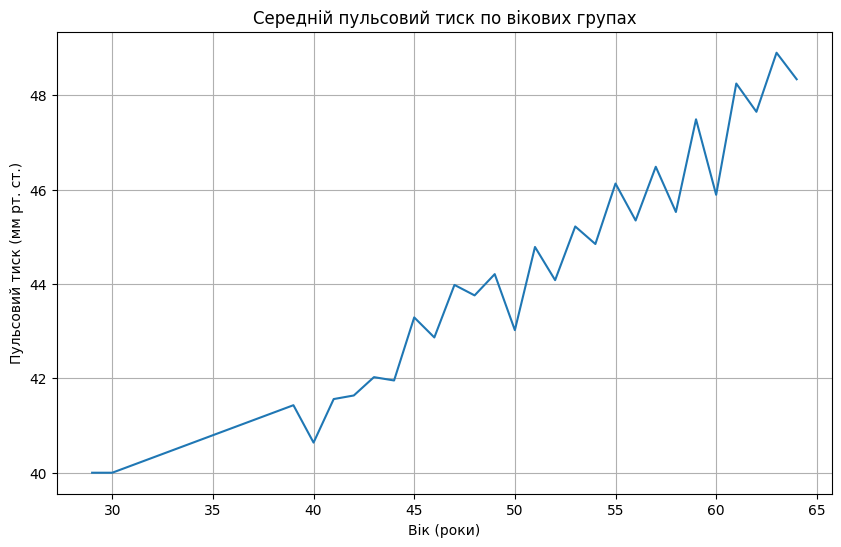

In [82]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='pulse_pressure', data=df_grouped)
plt.title('Середній пульсовий тиск по вікових групах')
plt.xlabel('Вік (роки)')
plt.ylabel('Пульсовий тиск (мм рт. ст.)')
plt.grid(True)
plt.show()

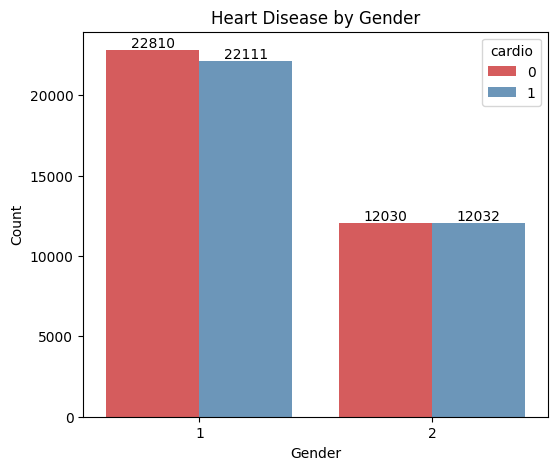

In [85]:
plt.figure(figsize=(6,5))
axis=sns.countplot(data=df, x='gender', hue='cardio', palette='Set1' , alpha=0.8)
axis.bar_label(axis.containers[0]);
axis.bar_label(axis.containers[1]);
plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

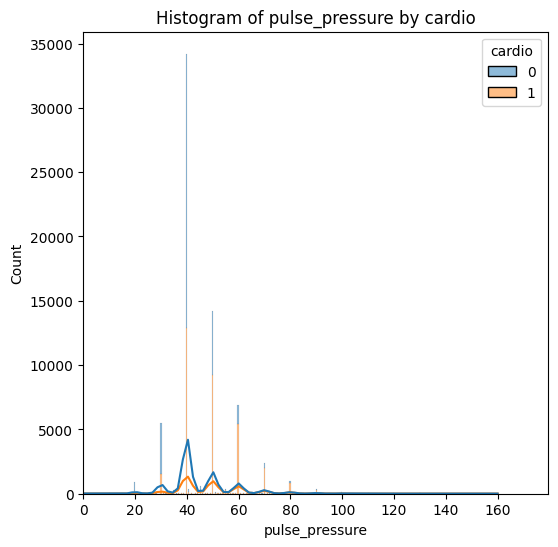

In [24]:
numerical_columns = ['pulse_pressure']
for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(data=data, x=col, hue='cardio', multiple='stack', kde=True)
    plt.xlim(0,None)
    plt.title(f'Histogram of {col} by cardio')
    plt.show()